In [1]:
import numpy as np
import matplotlib.pyplot as plt
def error(phi_a,phi_n):
    # compute error between analytical and numerical numbers

    return (phi_a-phi_n)/phi_a*100

## Uniform grid
Construct a matrix solver for Finite Difference Method and using Central difference scheme for 
<img src="img/FDquestion1.png">


/var/folders/q9/8vn_nzj55b55_336zczh1y2c0000gp/T/ipykernel_2316/4283525373.py:6: RuntimeWarning: divide by zero encountered in divide
  return (phi_a-phi_n)/phi_a*100


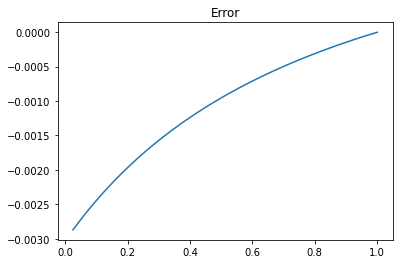

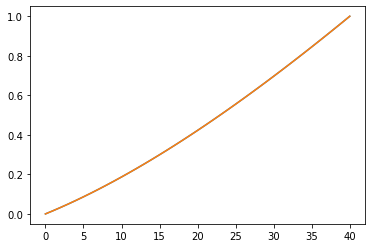

In [2]:

N=41    # Number of grid points
L = 1   # length
M = np.zeros((N,N)) # an empty matrix
S = np.zeros(N)

dx = L/(N-1)    # Grid size

# Left BCs
M[0,0]=1
S[0] = 0

# Right BCs
M[N-1,N-1] = 1
S[-1] = 1

# Construct Sparse Matrix
# Interior
for i in range(1,N-1):
    M[i,i] = -2/(dx**2)
    M[i,i-1] = 1/(dx**2)
    M[i,i+1] = 1/(dx**2)
    
    # Construct RHS matrix
    S[i] = np.exp(-i*dx)

# Numerical method
phi = np.matmul(np.linalg.inv(M),S)

# Analytical method 
phi_A = np.zeros((N))
for i in range(N):
    x = i * dx
    phi_A[i] = np.exp(-x)+(2-np.exp(-1))*x-1

# Error
e = error(phi_A,phi)

#
plt.title('Error')
plt.plot(np.arange(0,L+dx,dx),e)
plt.figure()
plt.plot(phi)
plt.plot(phi_A)

## Streching grid
<img src="img/FDquestion2.png">Strech factor=1.02
<img src="img/FDStrechGridSchemetic.png">
<img src="img/FDStrechGridEqn.png">

(0.0, 100.0)

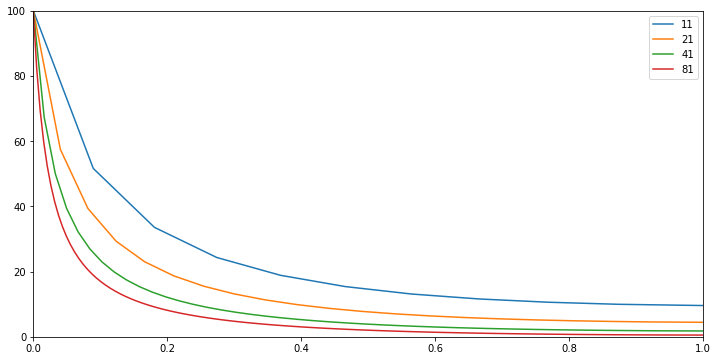

In [4]:
n = [11,21,41,81]
plt.figure(figsize=(12,6))
for N in n:
    L = 1
    s = 1.02
    x0 = L/((s-np.power(s,N))/(1-s))

    M = np.zeros((N,N)) # an empty matrix
    S = np.zeros(N)

    # Left BCs
    M[0,0]=1
    S[0] = 0

    # Right BCs
    M[N-1,N-1] = 1
    S[-1] = 1
    x = 0
    dx_list = [0]
    for i in range(1,N-1):

        # If in first loop, then current node is i=2, its left node is x0, its right node is s * x0
        if i == 1:    
            dx_w = x0
            x+=dx_w

        # If in first loop, then current node is i>2, its left node dx_w is previous dx_e, its right node is s * dx_w
        else:
            dx_w = dx_e
            x+=dx_e
        
        dx_e = s * dx_w


        M[i,i] = -2*(dx_w+dx_e) / ( dx_w * dx_e *(dx_w + dx_e ) )
        M[i,i-1] = 2*dx_e / ( dx_w * dx_e * (dx_w + dx_e) )
        M[i,i+1] = 2*dx_w / ( dx_w * dx_e * (dx_w + dx_e))
        S[i] = 2*x-1
        
        # for plot
        dx_list.append(x)


    # Numerical method
    phi = np.matmul(np.linalg.inv(M),S)

    # Analytical method 
    phi_A = np.zeros((N))
    x=0
    for i in range(N):
        
        if i == 1:    
            dx_w = x0
            x+=dx_w
        else:
            dx_w = dx_e
            x+=dx_e
        
        dx_e = s * dx_w
        
        phi_A[i] = x**3/3 - x**2/2 + 7*x/6

    dx_list.append(L)
    # plot errors
    e = error(phi_A,phi)
    plt.plot(dx_list,e,label=str(N))
plt.legend()
plt.xlim([0,1])
plt.ylim([0,100])

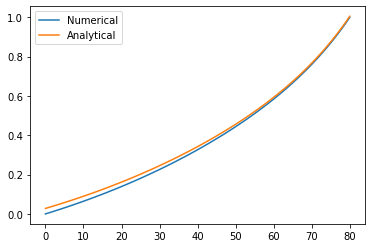

In [5]:
# Error
e = error(phi_A,phi)

#
# plt.title('Error')
# plt.plot(np.arange(0,L+dx,dx),e)
# plt.figure()
plt.plot(phi,label='Numerical')
plt.plot(phi_A,label='Analytical')
plt.legend()

## 2D uniform grid
<img src="FDQ3_1.png">
<img src="FDQ3_2.png">
<img src="FDQ3_3.png">

In [5]:
# numbering scheme used is k = (j-1)*N + i

N = 21

L = 1   # length
M = np.zeros((N**2,N**2)) # an empty matrix
S = np.zeros(N**2)

dx = L/(N-1)    # Grid size
dy = L/(N-1)    # Grid size

for i in range(1,N-1):
    
    for j in range(1,N-1):
        
        k = (j-1)*N + i
        M[k,k] = -2/dx**2 - 2/dy**2
        M[k,k-1] = 1/dx**2
        M[k,k+1] = 1/dx**2

        M[k,k-N] = 1/dy**2
        M[k,k+N] = 1/dy**2

        x = i*dx
        y = j*dy
        S[k] = 50000*np.exp(-50*((1-x)**2+y**2))*(100*((1-x)**2+y**2)-2)
        

## Right BC
i = N-1 
for j in range(N):
    k = (j-1)*N + i

    y = j*dy
    x = i*dx
    M[k,k] = 1
    S[k] = 100*(1-y) + 500*np.exp(-50*y**2)

## left BC
i = 0
for j in range(N):
    k = (j-1)*N + i
    y = j*dy
    x = i*dx
    M[k,k] = 1
    S[k] = 500 * np.exp(-50*(1+y**2))

## Bottom BC
j=0
for i in range(N):
    k = (j-1)*N + i
    x = i*dx
    y = j*dy
    M[k,k] = 1
    S[k] = 100*x + 500*np.exp(-50*(1-x)**2)

## Top BC
j=N-1
for i in range(N):
    k = (j-1)*N + i
    x = i*dx
    y = j*dy
    M[k,k] = 1
    S[k] = 500 * np.exp(-50*((1-x)**2+1))

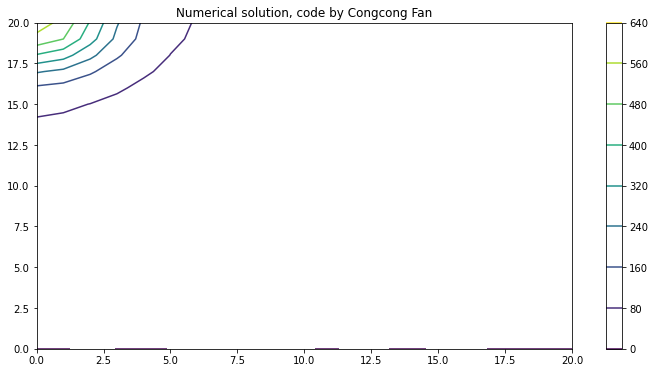

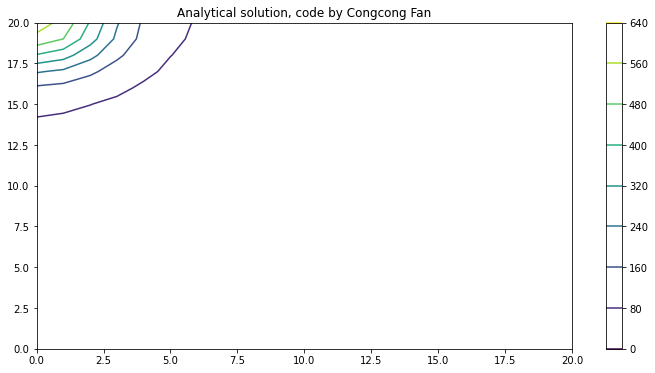

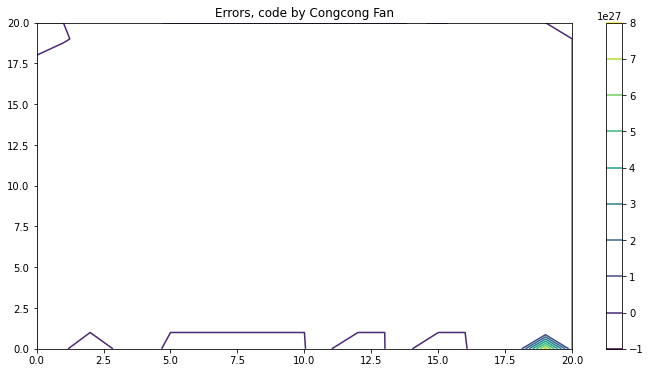

In [4]:
# Numerical method
phi1D = np.matmul(np.linalg.inv(M),S)
phi2D = np.zeros((N,N))
# Convert phi1D to 2D
for i in range(N):
    for j in range(N):
        k = (j-1)*N + i
        phi2D[i,j]=phi1D[k]

# Analytical method 
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.linspace(0,1,N)
        y = np.linspace(0,1,N)
        phi_A[i,j] = 500*np.exp(-50*((1-x[i])**2+y[j]**2))+100*x[i]*(1-y[j])

# Error
e = error(phi_A,phi2D)

#
x,y = np.meshgrid(np.linspace(-10,10,N),np.linspace(-10,10,N))
plt.figure(figsize=(12,6))
plt.contour(phi2D)
plt.title('Numerical solution, code by Congcong Fan')
plt.colorbar()

plt.figure(figsize=(12,6))
plt.title('Analytical solution, code by Congcong Fan')
plt.contour(phi_A)
plt.colorbar()

plt.figure(figsize=(12,6))
plt.title('Errors, code by Congcong Fan')
plt.contour(e)
plt.colorbar()